### Optativa: Optimización en la Industria / MHs
### UNSL - 2024
# Práctico 2:
## Algoritmos Evolutivos


NOTA 1
Los enunciados de los ejercicios están escritos en celdas de tipo Markdown y la respuesta/solución a cada uno de ellos debe ser presentado en una secuencia de una o mas celdas de tipo Code o Markdown, según corresponda e insertadas luego de cada enunciado. Si la solución o respuesta del ejercicio es texto y/o alguna expresión en Latex, entonces usar una celda Markdown.

NOTA 2:
El código mencionado en cada uno de los ejercicios se encuentra en la carpeta "software" de la asignatura.



$\mathbf{Ejercicio} \,\,1$:  Dado el siguiente demo (https://rednuht.org/genetic_cars_2/), realizar un análisis de lo que muestra.

a. Indicar las variables de decisión que el Algoritmo Genético codifica en cada uno de sus individuos y si es posible, indicar el dominio de los valores respectivos.

b. ¿Respecto a la función de fitness, podría ser considerada un función de tipo "black-box"?. Justificar su respuesta.


++++++++++++++++++++++++

$\mathbf{Respuesta}$

a.
$$
\begin{array}{l | l | l}
\text{Variable} & \text{Genes utilizados} & \text{Dominio}\\
\hline
\text{Forma} & 8, \text{1 por vértice } & \\
\text{Tamaño de la rueda} & 2, \text{1 por rueda} & [0,2; 0,7] \\
\text{Posición de la rueda} & 2, \text{1 por rueda} &  \\
\text{Densidad de la rueda} & 2, \text{1 por rueda} & [40, 140] \\
\text{Densidad del chasis} & 1 & [30, 330] \\
\end{array}
$$

b. La función de fitness podría ser considerada una función de tipo caja negra, ya que su valor es determinado por medio de una simulación y no haciendo uso de una fórmula analítica.

_________________________

$\mathbf{Ejercicio} \,\,2$: Analizar el código de "ga-oracion.py". Indicar lo que este programa realiza y dar una descripción de cómo aplica los operadores genéticos y lo que calcula la función de fitness. Pruebe el algoritmo para aprender una oración por Ud. establecida distinta a la que está escrita en el código provisto.

++++++++++++++++++++++++

$\mathbf{Respuesta}$

Lo que hace el programa es partiendo de `POPULATION_SIZE` cadenas de caracteres aleatorias hacer uso de un
algoritmo genético para buscar la cadena original.

En cuanto a la aplicación de los operadores genéticos:
- Selección:
  - Los pares de indivuduos para reproducción se seleccionan de forma pseudo-aleatoria dentro del 50% de los individuos con la mejos métrica de fitness
- Reproducción
  - De cada par de individuos seleccionados se obtiene un único descendiente.
  - Cada gen del cromosoma resultante de la crusa, entre dos progenitores, tiene un 50% de probabilidades de ser de cada uno de los progenitores.
  - Mutación: cada gen tiene un 10% de probabilidades de mutar a un valor pseudo-aleatorio dentro de los valroes posibles.
- Politica Generacional: elistista, el 10% de los individuos con mejor métrica de fitness forma parte de la siguiente generación.

La función de fitness calcula el número de caracteres en los que difiere una cadena dada con la cadena que se está
buscando.

Al probar el programa con la oración "Probando el primer algoritmo genetico" el programa encontró la oración en la generación 745.

_________________________


$\mathbf{Ejercicio} \,\,3$: Analizar el código de "ga-simple.py". Indicar lo que este programa realiza y dar una descripción de cómo aplica los operadores genéticos y lo que calcula la función de fitness.
  

++++++++++++++++++++++++

$\mathbf{Respuesta}$

Este programa parte de un vector aleatorio de 1s y 0s y genera `maximum_generation` generaciones haciendo uso de un algoritmo genético aproximando un vector de referencia, guardando la el mejor valor de función de fitness de los individuos de la generación para después mostrar una gráfica con dichos valroes.

En cuanto a los operadores genéticos:
- Selección: el algoritmo utiliza una selección por torneo, parte de dos individuos aleatorios y selecciona aquel con una función de fitness más alta.
- Reproducción:
  - El algoritmo utiliza crossover de un punto, el cual se decide de forma aleatoria.
  - Mutación: cada gen tiene probabilidad `mutation_rate` de mutar, en cual caso se niega su valor, si era 0 pasa a ser 1 y si era 1 pasa a ser 0.
- Política generacional: se utiliza reemplazo total de la población.

La función fitness calcula la cantidad de posiciones en las cuales los valores de un vector coinciden con el valor correspondiente del vector de referencia.

_________________________

$\mathbf{Ejercicio} \,\,4$: Modifique el algoritmo "ga-simple.py" de manera que optimice la siguiente función objetivo:

$$
f(x_1, \dots, x_n) =  (\sum_{i=1}^{n-1} sen^2(x_{i}))\times cos(x_{n}),
$$
donde: $0 \leq x_i \leq \pi$ para $i=1, \dots, 75$.

Considere la posibilidad de que $n$ sea un parámetro del algoritmo elegido por el usuario cuyo valor esté en el siguiente rango $10 \leq n \leq 100$.


+++++++++++++++++++++++

$\mathbf{Respuesta}$

El código correspondiente a la respuesta se encuentra en el archivo adjunto `ej4.py`.

_________________________


$\mathbf{Ejercicio} \,\,5$:  Dado el código de programa "ga-oracion.py", se pide generar "ga-oracion-2.py" en el cual la
 función de fitness se construya considerando la suma acumulada de la distancia de los respectivos caracteres de un individuo corriente a la solución buscada (TARGET en el código).
Por ejemplo, si el invididuo corriente es "glna" y la solución TARGET es "casa" la suma de la distancia de "glna" a "casa" es: $dist(g,c) + dist(l,a) + dist(n,s) + dist(a,a)$. Aquí también se busca minimizar la función objetivo, tratando de llegar al valor 0.
¿Cuál de las dos versiones de estos algoritmos considera que es más efeciente? si es que encuentra alguna diferencia en los respectivos desempeños.


++++++++++++++++++++++++

$\mathbf{Respuesta}$

El código se encuentra en el archivo adjunto ga-simple-2.py.

Para probar la diferencia entre los desempeños se realizaron 30 ejecuciones de cada uno de los programas, ejecutando el código más abajo se pueden ver los intervalos de confianza del número de generaciones requerido por cada uno de los programas para encontrar la oración objetivo. Se utilizó $\alpha = 0.05$, para los intervalos.

En la gráfica se puede ver con bastante claridad que el rendimiento del programa original resulta superior.

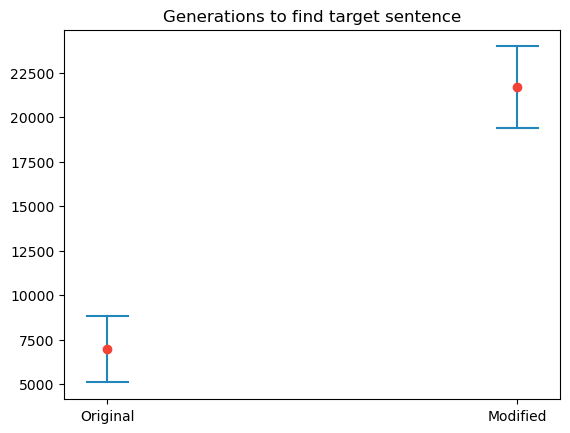

In [4]:
import matplotlib.pyplot as plt
import statistics
from math import sqrt

ga_simple = [8069, 5616, 5751, 1927, 8687, 6242, 6447, 15598, 2123, 9598, 7474, 8314, 16337, 2745, 2578, 21288, 8694, 3234, 10967, 2635, 2452, 3325, 2060, 16272, 1029, 2948, 1899, 11556, 10192, 2756]
ga_simple_2 = [16430, 17194, 19691, 25511, 28934, 20722, 18339, 22510, 28011, 18388, 17449, 16662, 13792, 19821, 19760, 22113, 21341, 45517, 30858, 22453, 27148, 27048, 26731, 14994, 17197, 22208, 13203, 20406, 18254, 17517]

def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.1):
    mean = statistics.mean(values)
    stdev = statistics.stdev(values)
    confidence_interval = z * stdev / sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color='#f44336')

plt.xticks([1, 2], ['Original', 'Modified'])
plt.title('Generations to find target sentence')
plot_confidence_interval(1, ga_simple)
plot_confidence_interval(2, ga_simple_2)
plt.show()

_________________________

$\mathbf{Ejercicio} \,\,6$: Si deseamos usar el "ga-simple.py" para resolver el Problema de la Mochila, ¿qué sería necesario cambiar o tener en cuenta para poder lograrlo?

++++++++++++++++++++++++

$\mathbf{Respuesta}$

Para resolver el problema de la mochila sería necesario cambiar la función de fitness, ya que los cromosomas pueden ser ya interpretados como soluciones al problema.

Además sería necesario cambiar algunos de los aspectos de inicialización y la información mantenida por fuera de los individuos, como la capacidad de la mochila y los pesos y beneficios de los distintos ítems, que ahora serán necesarios para calcular la función de fitness.

Una consideración necesaria es asignar una métrica de fitness más baja a asignaciones resultantes de la reproducción que representen asignaciones no válidas de valores. En este caso serían asignaciones cuyos pesos superen la capacidad de la mochila.

Adjunto en el archivo `ej6.py` se encuentra la versión modificada para la resolución del problema de la mochila. Se utilizaron los parámetros del ejercicio 4 del práctico 1.

Al probar el programa modificado se observo que el puntaje algunas veces se estabilizada por debajo del máximo puntaje obtenido en todas las generaciones. En consecuencia se realizaron algunas modificaciones adicionales para mantener a una fracción de los mejores individuos para la siguiente generación. Si bien con esta modificación los puntajes son motonamente crecientes, en las ejecuciones realizadas no se observo una mejora consiste con respecto al original.

_________________________

$\mathbf{Ejercicio} \,\,7$: Idem anterior para el Problema de Viajante de Comercio.

++++++++++++++++++++++++

$\mathbf{Respuesta}$

Para este, en adición a los ítems del punto anterior es necesario cambiar la función para obtener el fenotipo o la codificación del cromosoma para que el mismo codifique una solución al problema. Adicionalmente en este caso es necesario tener en cuenta que se está intentando minimizar un valor, lo que se podría lograr haciendo que la métrica de fitness sea el negativo de la distancia o minimizando la métrica de fitness.

En el caso de cambiar la representación también será necesario cambiar el operador de mutación.

Adjunto en el archivo `ej7.py` se encuentra la versión modificada para la resolución del problema de la mochila. Se utilizaron los parámetros del ejercicio 4 del práctico 1.

Con estas moficaciones se notó que con el método de reproducción original la población se degradaba hasta consistir de asignaciones de valores inválidos.

Se consiguió eliminar estos problemas haciendo uso de una política generacional elitista, otro método de reproducción, o una combinación de ambos.

En las ejecuciones realizadas el nuevo método de reproducción generó mejores resultados en un menor número de generaciones, pero tardando considerablemente más en ser ejecutado. Si bien en este caso el algoritmo funcionaba sin ser elitista, los resultados obtenidos por el mismo fueron considerablemente peores.